<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
# import statements
import re
import pandas as pd
import numpy as np
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/pylab/config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
# read in data
amazon_revs = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
amazon_revs.head()

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
# take a look at the features
amazon_revs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [4]:
# select just the more useful features from the dataframe
amazon_revs = amazon_revs[['reviews.text', 'categories', 'primaryCategories', 'reviews.rating']]
amazon_revs.head()

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews.text,categories,primaryCategories,reviews.rating
0,I order 3 of them and one of the item is bad q...,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3
1,Bulk is always the less expensive way to go fo...,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4
2,Well they are not Duracell but for the price i...,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5
3,Seem to work as well as name brand batteries a...,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5
4,These batteries are very long lasting the pric...,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5


In [5]:
# a lot of categories
n_categories = amazon_revs['categories'].nunique()
n_categories

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


60

In [6]:
# better number of categories
n_primaryCategories = amazon_revs['primaryCategories'].nunique()
n_primaryCategories

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9

In [7]:
# these categories look more to the point
amazon_revs.primaryCategories.unique()

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Health & Beauty', 'Electronics', 'Office Supplies',
       'Animals & Pet Supplies', 'Home & Garden', 'Electronics,Furniture',
       'Toys & Games,Electronics', 'Electronics,Media',
       'Office Supplies,Electronics'], dtype=object)

In [8]:
# this is the only data I will use
amazon_revs = amazon_revs[['reviews.text', 'primaryCategories']]
amazon_revs.head()

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews.text,primaryCategories
0,I order 3 of them and one of the item is bad q...,Health & Beauty
1,Bulk is always the less expensive way to go fo...,Health & Beauty
2,Well they are not Duracell but for the price i...,Health & Beauty
3,Seem to work as well as name brand batteries a...,Health & Beauty
4,These batteries are very long lasting the pric...,Health & Beauty


In [9]:
# want to be able to work in parallel
import mapply
mapply.init(n_workers=3, chunk_size=100, progressbar=True)

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# create lemmas
nlp = spacy.load("en_core_web_lg")

STOP_WORDS = nlp.Defaults.stop_words.union(['$', 'amazon', 'prime'])

amazon_revs['lemmas'] = amazon_revs['reviews.text'].mapply(
    lambda x: [token.lemma_.lower() for token in nlp(x) if (token.text.lower() not in STOP_WORDS) and (token.is_punct != True)]
)

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 40/40 [01:18<00:00,  1.96s/it]


In [13]:
amazon_revs.head()

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews.text,primaryCategories,lemmas
0,I order 3 of them and one of the item is bad q...,Health & Beauty,"[order, 3, item, bad, quality, miss, backup, s..."
1,Bulk is always the less expensive way to go fo...,Health & Beauty,"[bulk, expensive, way, product, like]"
2,Well they are not Duracell but for the price i...,Health & Beauty,"[duracell, price, happy]"
3,Seem to work as well as name brand batteries a...,Health & Beauty,"[work, brand, battery, well, price]"
4,These batteries are very long lasting the pric...,Health & Beauty,"[battery, long, last, price, great]"


In [14]:
# create Dictionary
id2words = corpora.Dictionary(amazon_revs['lemmas'])

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# create term document frequency
corpus = [id2words.doc2bow(tokens) for tokens in amazon_revs['lemmas']]

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# stores (token id, token count) for each doc in the corpus
doc_id = 10

# Human readable format of corpus (term-frequency)
[(id2words[word_id], word_count) for word_id, word_count in corpus[doc_id]]

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('battery', 1),
 ('price', 1),
 ('brand', 1),
 ('great', 1),
 ('basic', 1),
 ('buy', 1),
 ('believe', 1),
 ('equal', 1),
 ('find', 1),
 ('large', 1),
 ('one', 1),
 ('package', 1),
 ('soon', 1),
 ('start', 1),
 ('superior', 1)]

### Train LDA Model

In [17]:
%%time
### This cell runs the multi-processor version of the model (faster)
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2words,
                                                        num_topics=20, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=2)


lda_multicore.save('lda_multicore.model')

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
CPU times: user 23.7 s, sys: 4.28 s, total: 28 s
Wall time: 30.5 s


In [18]:
# load trained lda model
from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2words,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=2)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=id2words, corpus=corpus, texts=amazon_revs['lemmas'], start=2, limit=22, step=3)

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
CPU times: user 2min 13s, sys: 24.9 s, total: 2min 38s
Wall time: 3min 47s


/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


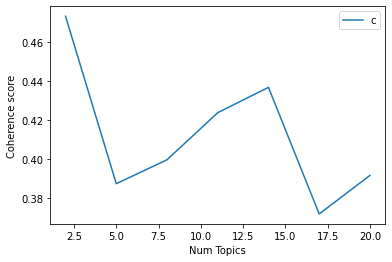

In [29]:
# visualize coherence scores to select number of topics
limit=21; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [22]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4732
Num Topics = 5  has Coherence Value of 0.3875
Num Topics = 8  has Coherence Value of 0.3998
Num Topics = 11  has Coherence Value of 0.4238
Num Topics = 14  has Coherence Value of 0.4368
Num Topics = 17  has Coherence Value of 0.3721
Num Topics = 20  has Coherence Value of 0.3918
/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# select optimal model based on coherence scores
optimal_model = model_list[4]

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# interactive visualizations
pyLDAvis.enable_notebook()
optimal_vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2words)
optimal_vis

/Users/keila/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-E0pgGHex/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.195057  0.026326       1        1  18.036593
7     -0.164415 -0.026181       2        1  10.345766
0     -0.179531  0.143199       3        1   8.947258
13     0.058220 -0.043374       4        1   8.204963
4     -0.224843 -0.133992       5        1   7.657578
11    -0.169200 -0.183204       6        1   7.100673
8     -0.083854  0.190582       7        1   7.014248
10     0.062577 -0.098944       8        1   6.071353
1      0.256227  0.011397       9        1   5.289403
3      0.038672  0.342743      10        1   5.132170
12     0.065568 -0.126496      11        1   4.530146
6      0.209226  0.046643      12        1   4.158636
9      0.127000 -0.029339      13        1   3.945692
5      0.199411 -0.119361      14        1   3.565520, topic_info=             Term          Freq         Total Category  logprob  loglift
22          great  10834.000000  10834.000000  Default  30.0000  30.0000
33           good   7695.000000   7695.000000  Default  29.0000  29.0000
82           love   6504.000000   6504.000000  Default  28.0000  28.0000
3716       tablet  10791.000000  10791.000000  Default  27.0000  27.0000
4         battery   4680.000000   4680.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
148        pretty    462.439302    717.962271  Topic14  -3.2214   2.8940
196           try    221.645409    497.240441  Topic14  -3.9568   2.5259
494    experience    108.362436    231.691094  Topic14  -4.6724   2.5739
130   replacement     68.321029    370.527944  Topic14  -5.1337   1.6431
156          time     68.807918   2289.068966  Topic14  -5.1266  -0.1707

[586 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
453       2  0.996280        1
203       2  0.996802       10
204       5  0.986867       12
750       5  0.996051       16
206       2  0.999342        2
...     ...       ...      ...
1087     14  0.877704      yay
95        2  0.999722     year
1070      5  0.998043    young
3123      8  0.995460  youtube
1397      2  0.998291       yr

[608 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 1, 14, 5, 12, 9, 11, 2, 4, 13, 7, 10, 6])

- I found that 14 is the best number of topics. Even though having 14 topics did not yield the largest coherence score, the words seem to go together more in each topic when there are 14 instead of 2 topics.
- The overlaps make a lot of sense.
- Custom stop words really helped. Because this dataset is about purchases on Amazon, I took out "amazon" and "prime". I was on the fence about removing "kindle", but because it is a product you buy, I kept it in.

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling